In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../Capstone/eda_data.csv')

In [3]:
data.dtypes


Age                 int64
Sex                object
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [4]:
dfo = data.select_dtypes(include=['object'])
data = pd.concat([data.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

In [5]:
data

Age  ChestPainType  RestingBP  Cholesterol  FastingBS  MaxHR  \
0     40              1        140          289          0    172   
1     49              2        160          180          0    156   
2     37              1        130          283          0     98   
3     48              3        138          214          0    108   
4     54              2        150          195          0    122   
..   ...            ...        ...          ...        ...    ...   
913   45              0        110          264          0    132   
914   68              3        144          193          1    141   
915   57              3        130          131          0    115   
916   57              1        130          236          0    174   
917   38              2        138          175          0    173   

     ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  Sex_F  Sex_M  \
0                 0      0.0         0             0      0      1   
1                 0      1.0         1             1      1      0   
2                 0      0.0         0             0      0      1   
3                 1      1.5         1             1      1      0   
4                 0      0.0         0             0      0      1   
..              ...      ...       ...           ...    ...    ...   
913               0      1.2         1             1      0      1   
914               0      3.4         1             1      0      1   
915               1      1.2         1             1      0      1   
916               0      0.0         1             1      1      0   
917               0      0.0         0             0      0      1   

     RestingECG_LVH  RestingECG_Normal  RestingECG_ST  
0                 0                  1              0  
1                 0                  1              0  
2                 0                  0              1  
3                 0                  1              0  
4                 0                  1              0  
..              ...                ...            ...  
913               0                  1              0  
914               0                  1              0  
915               0                  1              0  
916               1                  0              0  
917               0                  1              0  

[918 rows x 15 columns]

In [6]:
names = data.columns

In [7]:
scaleable = data[['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

In [8]:
scaler = StandardScaler()

In [9]:
scaled_df = scaler.fit_transform(scaleable)

In [10]:
scaled_df = pd.DataFrame(scaled_df)

In [11]:
scaled_df = scaled_df.rename(columns={0: 'Age', 1: 'ChestPainType', 2: 'RestingBP', 3: 'Cholesterol', 4: 'MaxHR', 5: 'Oldpeak'})

In [12]:
unscaled_df = pd.DataFrame(data[['FastingBS', 'ExerciseAngina', 'ST_Slope', 'HeartDisease', 'Sex_F', 'Sex_M', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST']])

In [13]:
unscaled_df

FastingBS  ExerciseAngina  ST_Slope  HeartDisease  Sex_F  Sex_M  \
0            0               0         0             0      0      1   
1            0               0         1             1      1      0   
2            0               0         0             0      0      1   
3            0               1         1             1      1      0   
4            0               0         0             0      0      1   
..         ...             ...       ...           ...    ...    ...   
913          0               0         1             1      0      1   
914          1               0         1             1      0      1   
915          0               1         1             1      0      1   
916          0               0         1             1      1      0   
917          0               0         0             0      0      1   

     RestingECG_LVH  RestingECG_Normal  RestingECG_ST  
0                 0                  1              0  
1                 0                  1              0  
2                 0                  0              1  
3                 0                  1              0  
4                 0                  1              0  
..              ...                ...            ...  
913               0                  1              0  
914               0                  1              0  
915               0                  1              0  
916               1                  0              0  
917               0                  1              0  

[918 rows x 9 columns]

In [14]:
scaled_df = pd.concat([scaled_df, unscaled_df], axis=1)

In [15]:
scaled_df

Age  ChestPainType  RestingBP  Cholesterol     MaxHR   Oldpeak  \
0   -1.433140      -1.345086   0.410909     0.825070  1.382928 -0.832432   
1   -0.478484      -0.270422   1.491752    -0.171961  0.754157  0.105664   
2   -1.751359      -1.345086  -0.129513     0.770188 -1.525138 -0.832432   
3   -0.584556       0.804242   0.302825     0.139040 -1.132156  0.574711   
4    0.051881      -0.270422   0.951331    -0.034755 -0.581981 -0.832432   
..        ...            ...        ...          ...       ...       ...   
913 -0.902775      -2.419749  -1.210356     0.596393 -0.188999  0.293283   
914  1.536902       0.804242   0.627078    -0.053049  0.164684  2.357094   
915  0.370100       0.804242  -0.129513    -0.620168 -0.857069  0.293283   
916  0.370100      -1.345086  -0.129513     0.340275  1.461525 -0.832432   
917 -1.645286      -0.270422   0.302825    -0.217696  1.422226 -0.832432   

     FastingBS  ExerciseAngina  ST_Slope  HeartDisease  Sex_F  Sex_M  \
0            0               0         0             0      0      1   
1            0               0         1             1      1      0   
2            0               0         0             0      0      1   
3            0               1         1             1      1      0   
4            0               0         0             0      0      1   
..         ...             ...       ...           ...    ...    ...   
913          0               0         1             1      0      1   
914          1               0         1             1      0      1   
915          0               1         1             1      0      1   
916          0               0         1             1      1      0   
917          0               0         0             0      0      1   

     RestingECG_LVH  RestingECG_Normal  RestingECG_ST  
0                 0                  1              0  
1                 0                  1              0  
2                 0                  0              1  
3                 0                  1              0  
4                 0                  1              0  
..              ...                ...            ...  
913               0                  1              0  
914               0                  1              0  
915               0                  1              0  
916               1                  0              0  
917               0                  1              0  

[918 rows x 15 columns]

In [16]:
X, y = scaled_df.dropna().drop(['HeartDisease'], axis=1), scaled_df.dropna()['HeartDisease']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [18]:
x_train.shape

(688, 14)

In [19]:
x_test.shape

(230, 14)

In [20]:
x_train.head()

Age  ChestPainType  RestingBP  Cholesterol     MaxHR   Oldpeak  \
155  0.264027       0.804242   1.221541     1.309865  0.518368  1.981855   
362  0.264027      -0.270422   1.221541    -1.818435 -1.485840 -0.832432   
869  0.582246      -0.270422   0.951331     0.120745  0.793455  0.668521   
101 -0.266338       0.804242  -0.129513    -0.181108 -1.446542 -0.832432   
199  0.370100      -2.419749  -0.129513     0.998865 -1.525138  0.105664   

     FastingBS  ExerciseAngina  ST_Slope  Sex_F  Sex_M  RestingECG_LVH  \
155          1               1         1      0      1               0   
362          0               0         1      0      1               0   
869          1               0         0      0      1               0   
101          0               0         0      0      1               0   
199          0               0         1      1      0               0   

     RestingECG_Normal  RestingECG_ST  
155                  1              0  
362                  0              1  
869                  1              0  
101                  1              0  
199                  1              0

# Modeling


## Logistic Regression

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 20)

rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


/Users/dyerm/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [22]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.361034
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.475      
Dependent Variable: HeartDisease     AIC:              688.8577   
Date:               2022-04-14 21:39 BIC:              751.5463   
No. Observations:   918              Log-Likelihood:   -331.43    
Df Model:           12               LL-Null:          -631.07    
Df Residuals:       905              LLR p-value:      1.5114e-120
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Age                 0.1242   0.1164  1.0674 0.2858 -0.1039  0.3523
ChestPainType       0.6780   0.1050  6.4578 0.0000  0

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [25]:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 89  24]
 [ 20 143]]


We have 89 + 143 Corrrect Predictions and 20 + 24 incorrect Predictions

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       113
           1       0.86      0.88      0.87       163

    accuracy                           0.84       276
   macro avg       0.84      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



In [28]:
print("Logistic Regression")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred))
print('Recall score' , metrics.recall_score(y_test,y_pred))

Logistic Regression
Accuracy: 0.8405797101449275
Balanced accuracy: 0.8324556164829795
Precision score 0.8562874251497006
Recall score 0.8773006134969326


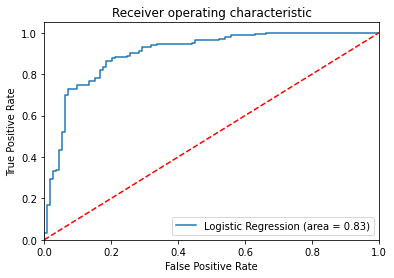

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## SVM

In [30]:
from sklearn import model_selection
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [32]:
svm = SVC(random_state=42, kernel='rbf')

svm = svm.fit(X_train, y_train)

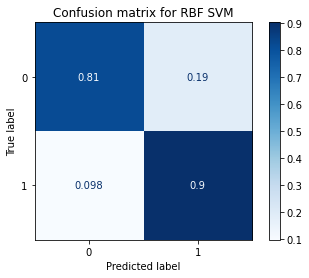

Model accuracy: 0.8659420289855072


In [33]:
matrix = plot_confusion_matrix(svm, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for RBF SVM')
plt.show(matrix)
plt.show()

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       113
           1       0.88      0.90      0.89       163

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



In [35]:
print("SVM")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred))
print('Recall score' , metrics.recall_score(y_test,y_pred))

SVM
Accuracy: 0.8659420289855072
Balanced accuracy: 0.8579998914164721
Precision score 0.875
Recall score 0.901840490797546


In [36]:
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV  

y_train_pred = svm.decision_function(X_train)    
y_test_pred = svm.decision_function(X_test) 


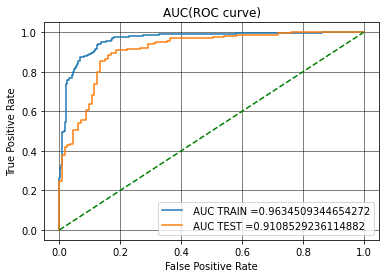

In [37]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## Tree Entropy Model NO Max Depth

In [38]:
from sklearn.tree import DecisionTreeRegressor 

In [39]:
from sklearn import tree, metrics
entr_model = tree.DecisionTreeClassifier(criterion='entropy', random_state=1234)

entr_model.fit(X_train, y_train)

y_pred = entr_model.predict(X_test)

pd.Series(y_pred)

entr_model


DecisionTreeClassifier(criterion='entropy', random_state=1234)

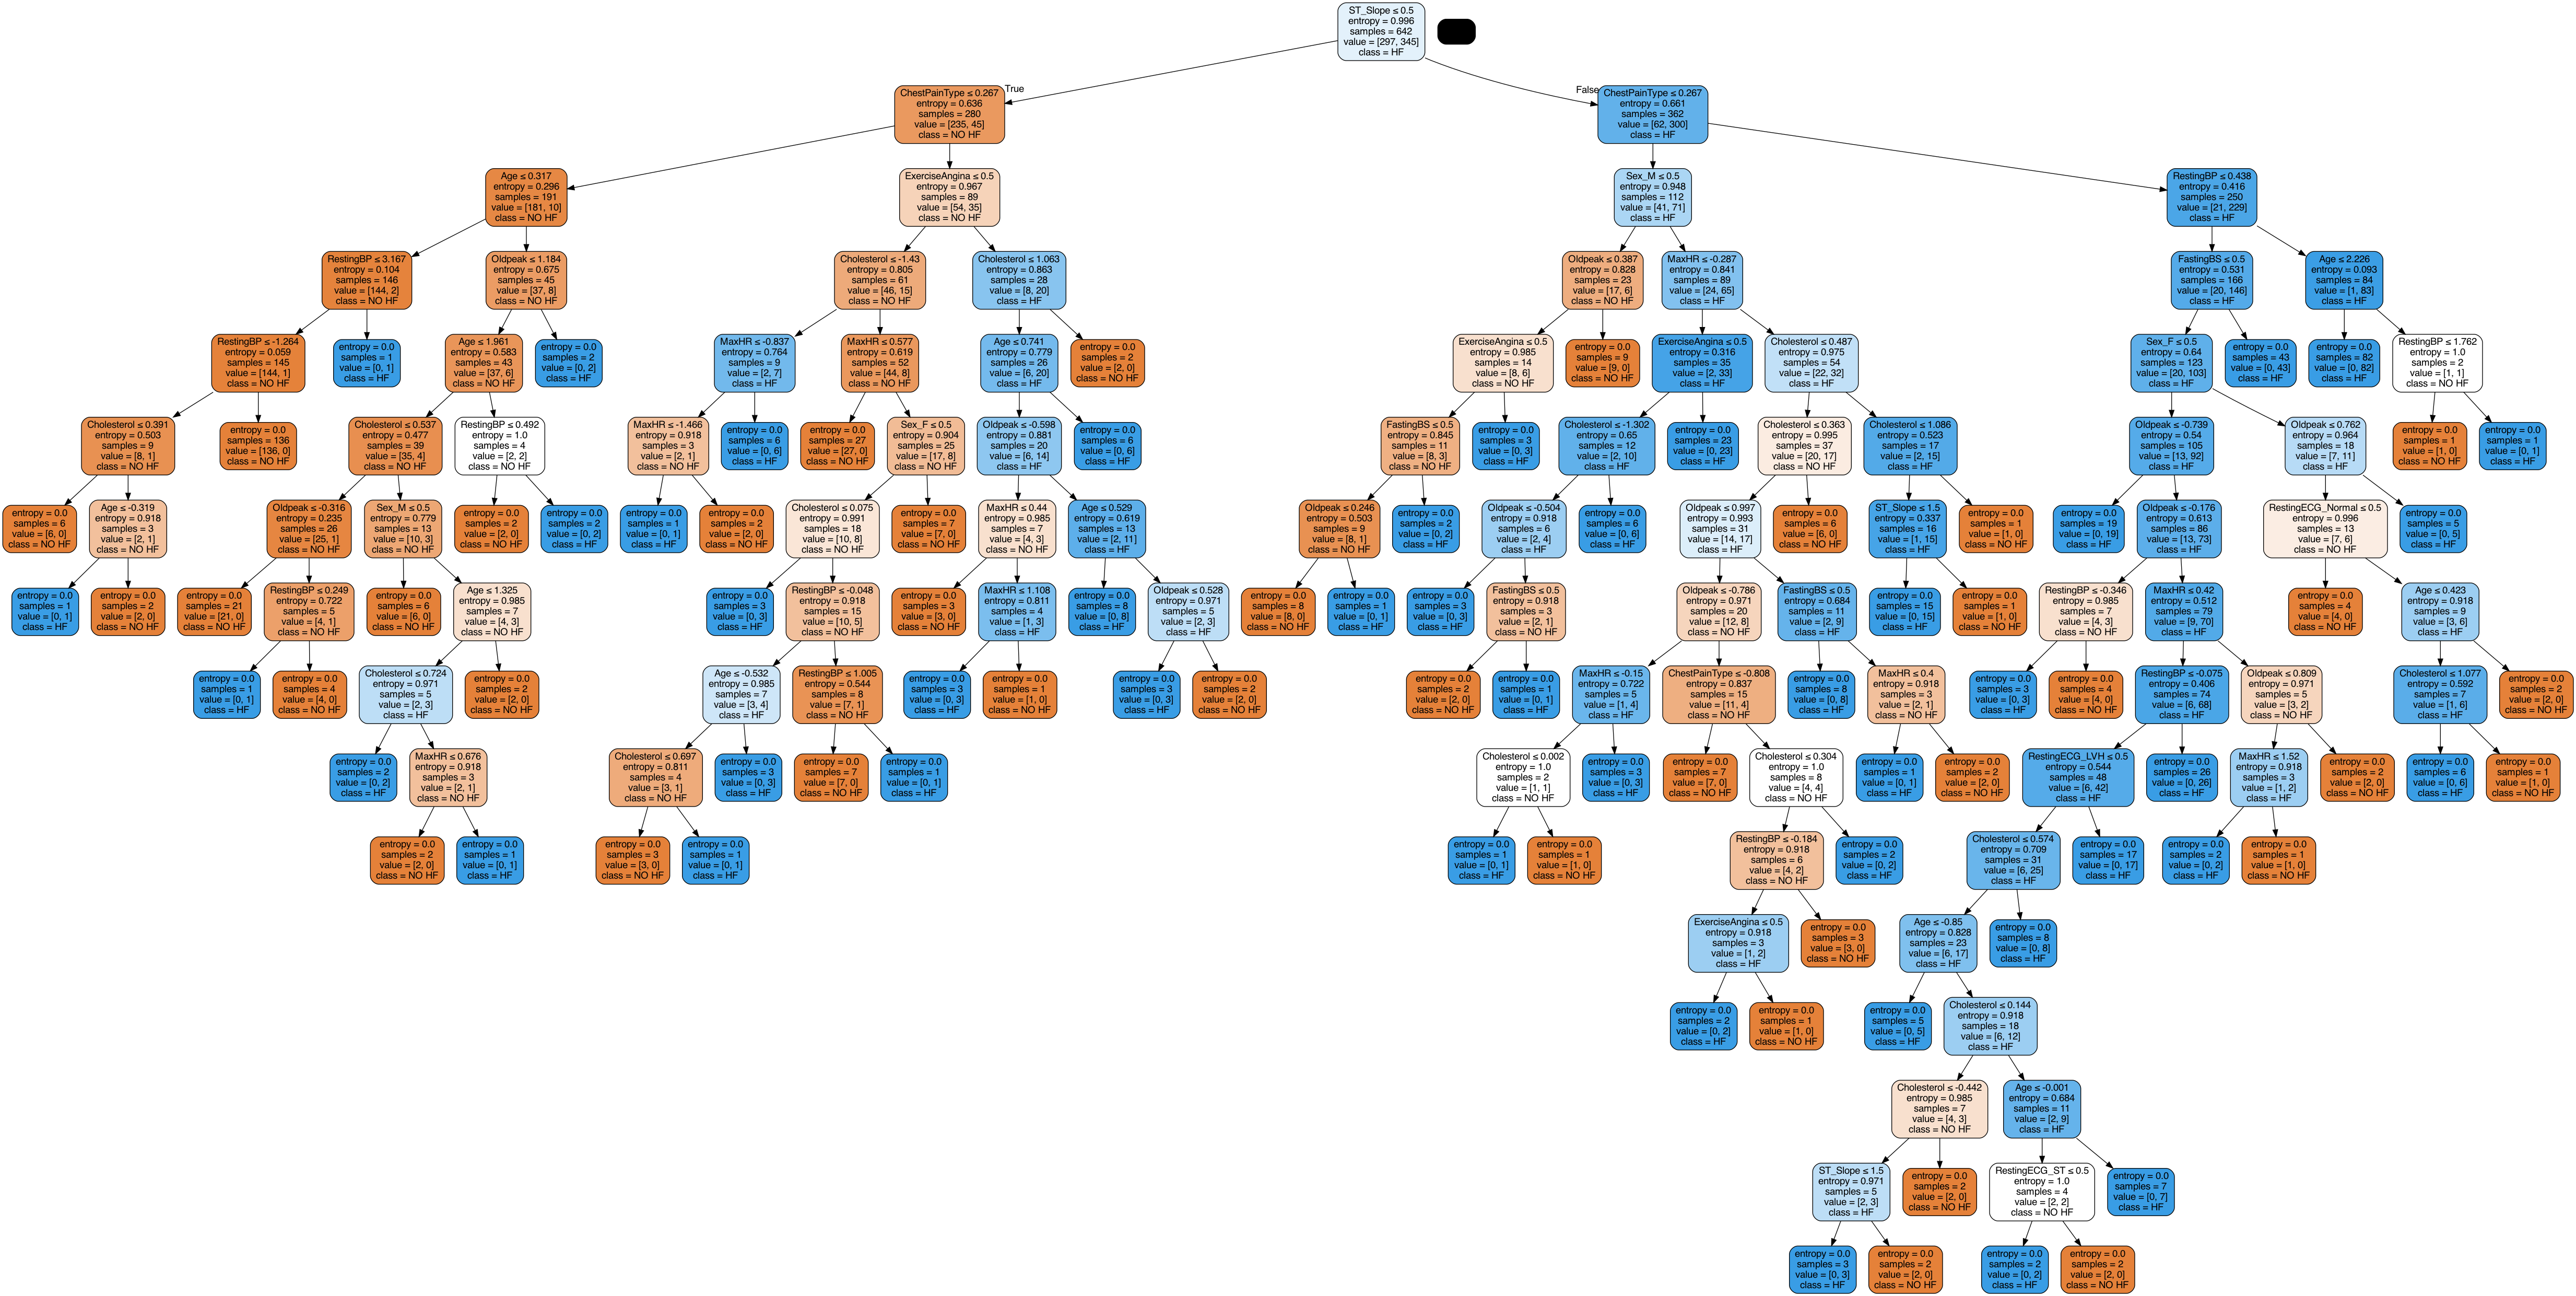

In [40]:
from io import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO HF", "HF"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [41]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.8333333333333334
Balanced accuracy: 0.8290352353547967
Precision score for "Yes" 0.8633540372670807
Precision score for "No" 0.7913043478260869
Recall score for "Yes" 0.852760736196319
Recall score for "No" 0.8053097345132744


## Tree Gini Model NO max depth

In [42]:
gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state=1234)

gini_model.fit(X_train, y_train)

y_pred = gini_model.predict(X_test)

pd.Series(y_pred)

gini_model

DecisionTreeClassifier(random_state=1234)

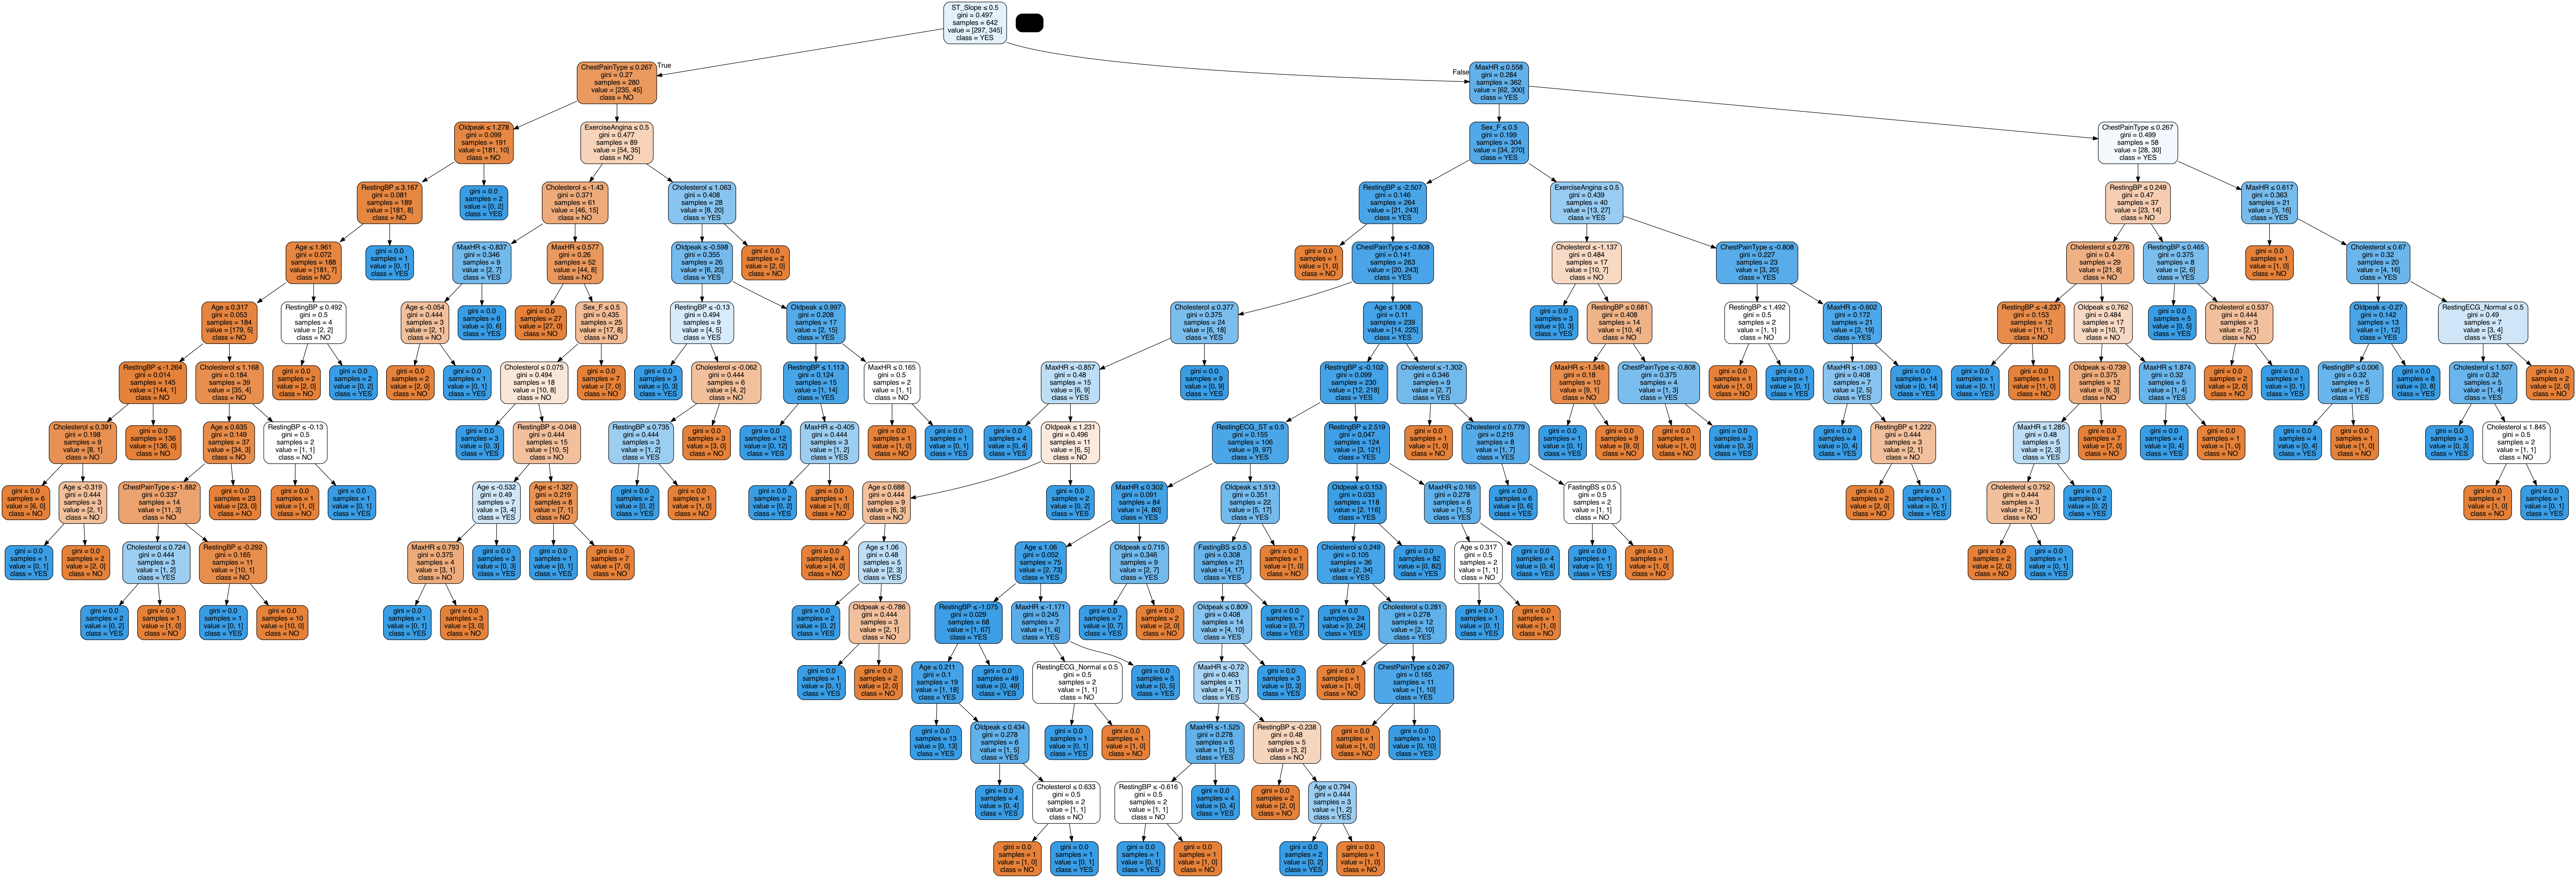

In [43]:
dot_data = StringIO() 
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [44]:
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred))
print('Recall score' , metrics.recall_score(y_test,y_pred))

Model Gini impurity model
Accuracy: 0.7862318840579711
Balanced accuracy: 0.785086052445844
Precision score 0.8376623376623377
Recall score 0.7914110429447853


## Tree Entropy Model Max Depth - 5

In [45]:
entr_model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1234)

entr_model2.fit(X_train, y_train)

y_pred = entr_model2.predict(X_test)

pd.Series(y_pred)

entr_model2


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1234)

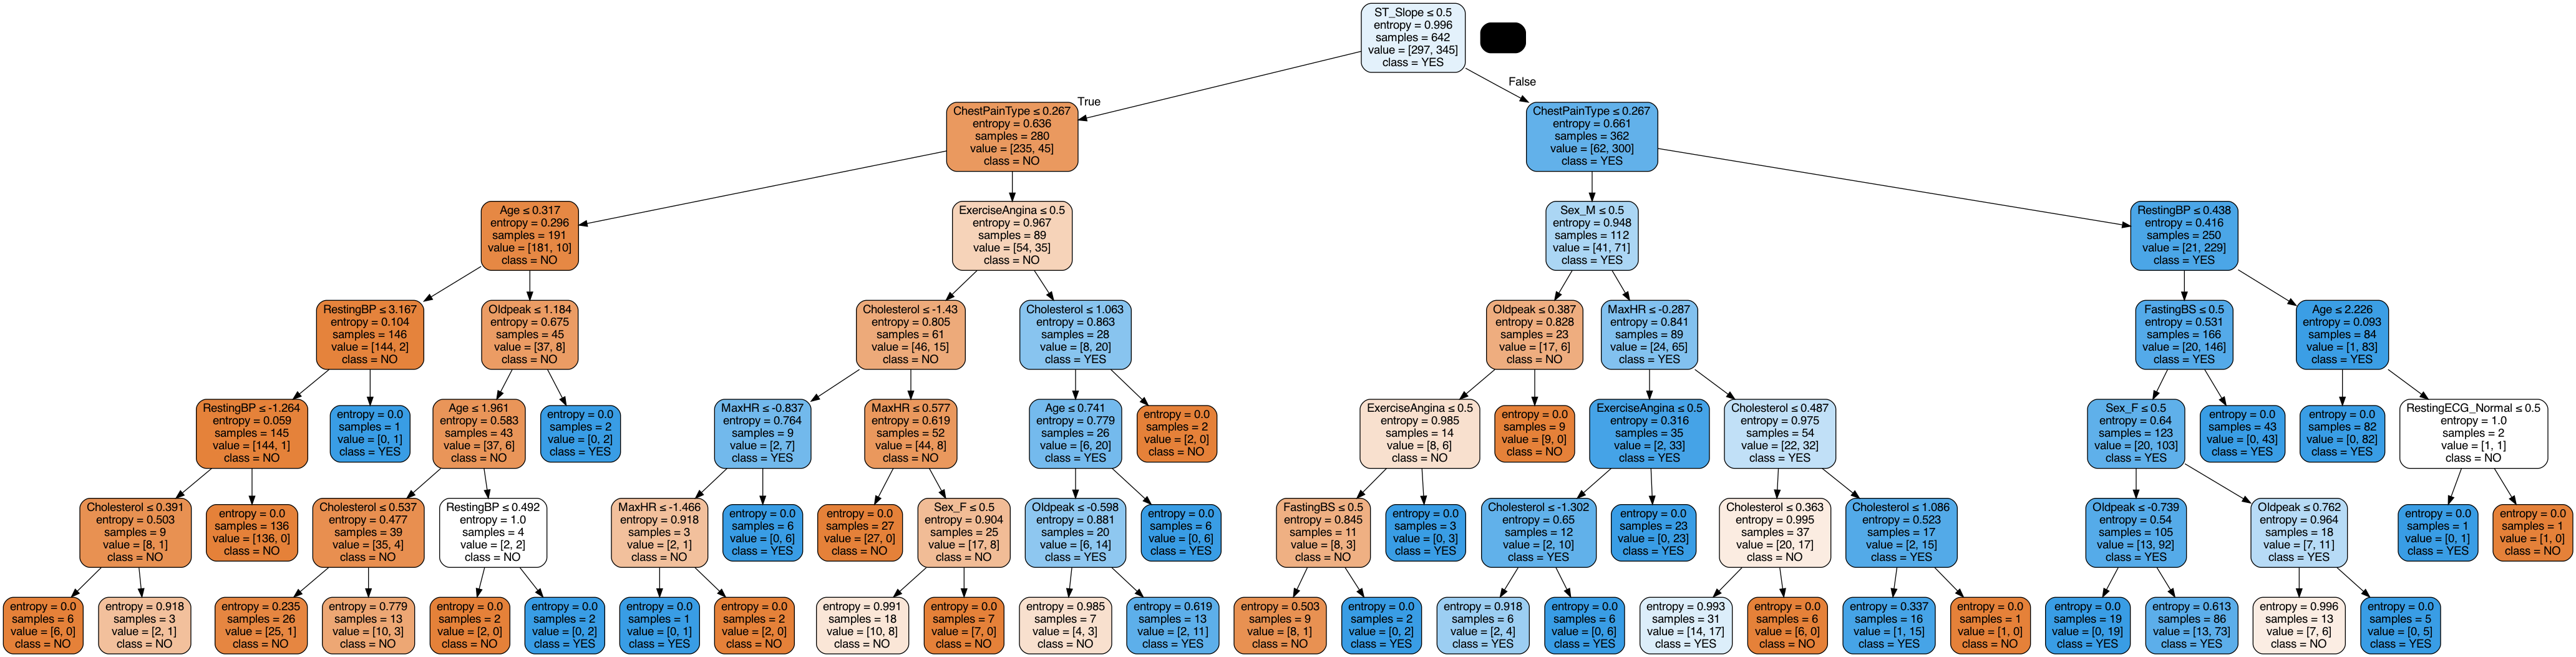

In [46]:
dot_data = StringIO() 
tree.export_graphviz(entr_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [47]:
print("Model Entropy model max depth 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred))

Model Entropy model max depth 5
Accuracy: 0.8442028985507246
Balanced accuracy: 0.8409522775394973
Precision score for "Yes" 0.875
Recall score for "No" 0.8588957055214724


## Tree Gini Model Max Depth - 3

In [53]:
gini_model2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=1234)

gini_model2.fit(X_train, y_train)

y_pred = gini_model2.predict(X_test)

pd.Series(y_pred)

gini_model2

DecisionTreeClassifier(max_depth=7, random_state=1234)

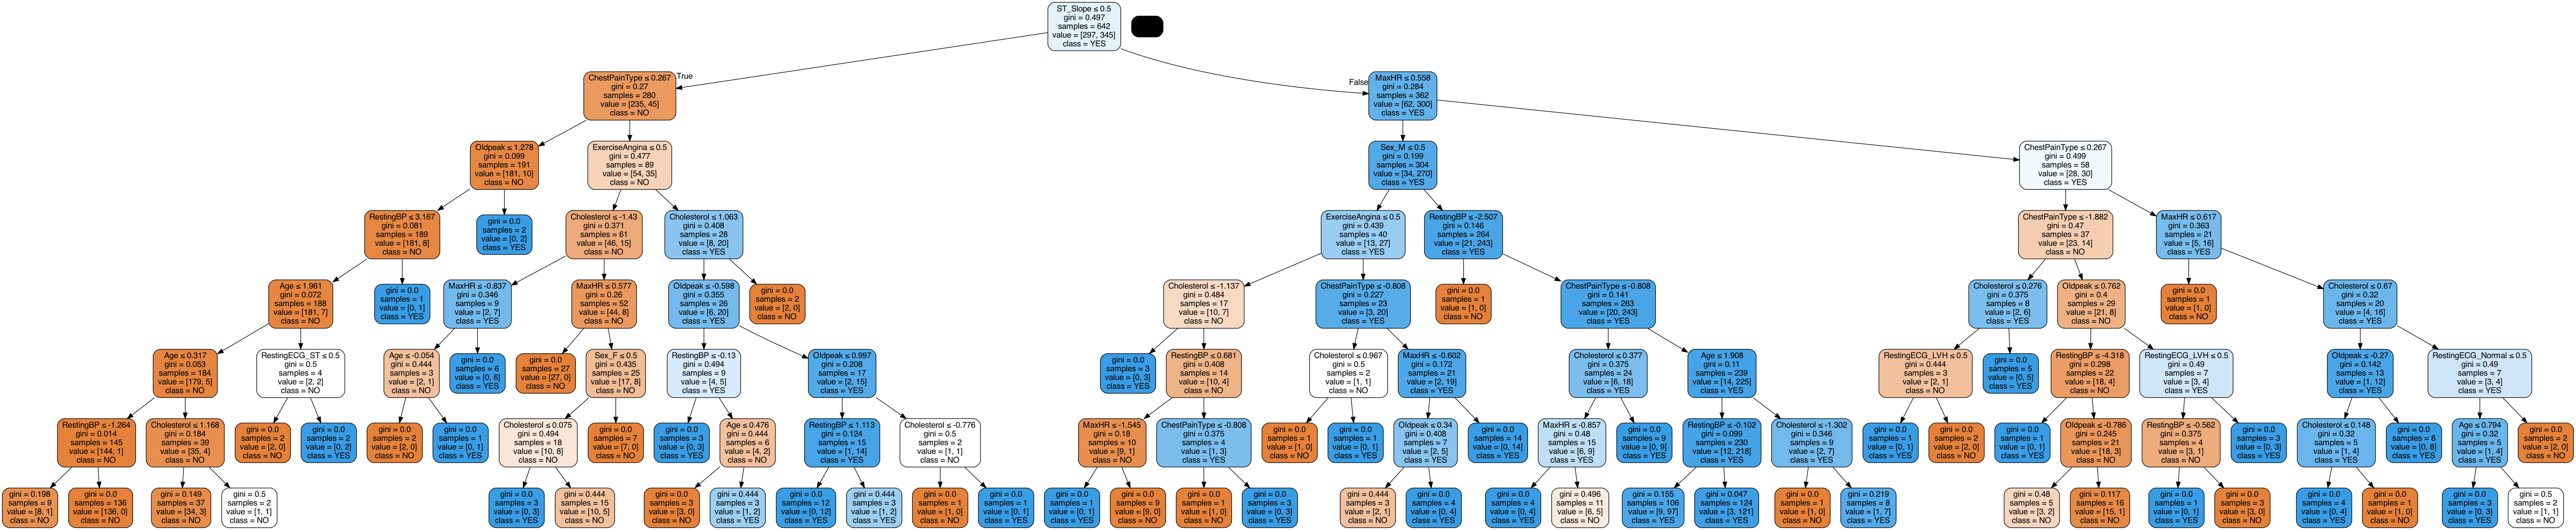

In [54]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [55]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred))
print('Recall score' , metrics.recall_score(y_test,y_pred))

Gini impurity  model - max depth 3
Accuracy: 0.8333333333333334
Balanced accuracy: 0.8331071176502525
Precision score 0.8774193548387097
Recall score 0.8343558282208589


## Random Forest Model

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [59]:
RFModel = RandomForestClassifier(max_depth=8, random_state=1234) 

RFModel.fit(X_train, y_train)

y_pred = RFModel.predict(X_test)

pd.Series(y_pred)

RFModel

print("Random Forest Classifier model - max depth 5")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred))
print('Recall score' , metrics.recall_score(y_test,y_pred))

Random Forest Classifier model - max depth 5
Accuracy: 0.8623188405797102
Balanced accuracy: 0.8535751126554102
Precision score 0.8698224852071006
Recall score 0.901840490797546


## KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [61]:
knn = KNeighborsClassifier()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))

roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.80      0.84        88
           1       0.83      0.92      0.87        96

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



0.856060606060606

In [62]:
print("KNearestNeighbor")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred))
print('Recall score' , metrics.recall_score(y_test,y_pred))

KNearestNeighbor
Accuracy: 0.8586956521739131
Balanced accuracy: 0.856060606060606
Precision score 0.8301886792452831
Recall score 0.9166666666666666


In [63]:
leaf_size = list(range(1,50))

n_neighbors = list(range(1,30))

p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn_2 = KNeighborsClassifier()

clf = GridSearchCV(knn_2, hyperparameters, cv=10)

best_model = clf.fit(X,y)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 17


In [64]:
knn_3 = KNeighborsClassifier(n_neighbors=17, leaf_size=1, p=1)

In [65]:
knn_3.fit(x_train, y_train)

y_pred = knn_3.predict(x_test)

print(classification_report(y_test, y_pred))

roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        88
           1       0.88      0.94      0.91        96

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



0.9005681818181819

In [66]:
print("KNearestNeighbor")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred))
print('Recall score' , metrics.recall_score(y_test,y_pred))

KNearestNeighbor
Accuracy: 0.9021739130434783
Balanced accuracy: 0.9005681818181819
Precision score 0.8823529411764706
Recall score 0.9375


## Final Thoughts

The KNN Hyperparemeter tuned classifier model performed the best as far as Accuracy (90%) is concerned.
The KNN Hyperparameter tuned classifier model performed the best as far as Recall (94%) is concerned. 

Since this problem is dealing with medical diagnoses, we would want to optimize for the highest recall score, so we would go with the Hyperparameter tuned KNN model.